<a href="https://colab.research.google.com/github/dianabohorquez/spotify/blob/main/TimeSeries_AutoML_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manchine Learning en Series Temporales

Esta notebook aplicará Machine Learning sobre las series temporales previamente trabajadas con modelos ARIMA y VAR. Todo el trabajo exploratorio se ha desarrollado en esas notebooks.

Las paginas que se tomaron como referencia para realizar este proyecto son:
* [Repositorio en GitHub de Srivatsan Srinivasan - Capítulo Series Temporales](https://github.com/srivatsan88/End-to-End-Time-Series)
* [Time Series modeling using Auto Time Series](https://youtu.be/URUiVD37fns)
* [Train multiple Time Series Forecasting Models in one line of Python Code](https://towardsdatascience.com/train-multiple-time-series-forecasting-models-in-one-line-of-python-code-615f2253b67a)
* [7 libraries that help in time-series problems](https://towardsdatascience.com/7-libraries-that-help-in-time-series-problems-d59473e48ddd)
* [Auto_TS: Auto_TimeSeries](https://pypi.org/project/auto-ts/)


In [ ]:
# Descarga de librerías
!pip3 install auto-ts

In [ ]:
# Instalación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from auto_ts import auto_timeseries

In [ ]:
# accessing to google
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)   #to attempt to forcibly remount  force_remount

# setting working directory
import os
os.chdir("/content/gdrive/My Drive/Data Scientist/spotify/datasets/")

Mounted at /content/gdrive


In [ ]:
# importación de datos
spotify = pd.read_csv('spotify_o.csv.zip', usecols=['release_date', 'energy', 'valence', 'popularity'], index_col='release_date', parse_dates=True)
spotify = spotify.groupby(pd.Grouper(freq="Q")).mean()
spotify = spotify.iloc[160:,]   # 160 para Q, 40 para A
spotify.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1961-03-31 to 2020-12-31
Freq: Q-DEC
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   valence     240 non-null    float64
 1   energy      240 non-null    float64
 2   popularity  240 non-null    float64
dtypes: float64(3)
memory usage: 7.5 KB


In [ ]:
# Split los datos en entrenamiento (95%) y test (5%)
# No arroja resultados en VAR con una partición 80/20
spotify_train = spotify.loc[:'2017']
spotify_test = spotify.loc['2018':]
spotify_test.shape

(12, 3)

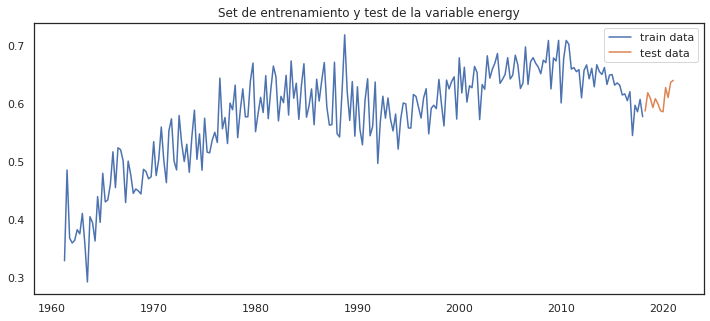

In [ ]:
# Graficar datos de entrenamiento, test de la variable energy
plt.figure(figsize=(12, 5))
plt.plot(spotify_train.index, spotify_train['energy'], label='train data');
plt.plot(spotify_test['energy'], label='test data')

# Plot legend and show figure
plt.legend()
plt.title('Set de entrenamiento y test de la variable energy');

## Popularity

Start of Fit.....
    Target variable given as = popularity
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: release_date sep: , target: popularity
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (228, 3)
No time series plot since verbose = 0. Continuing
Time Interval is given as Q
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 168 Test Shape: 12
    Root Mean Squared Error predictions vs actuals = 0.86
    Std Deviation of actuals = 1.15
    Normalized RMSE = 75%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 180 Test Shape: 12
    Root Mean Squared Error predictions vs 

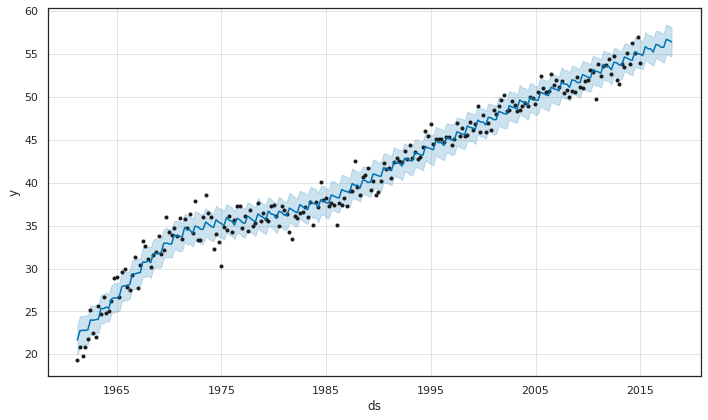

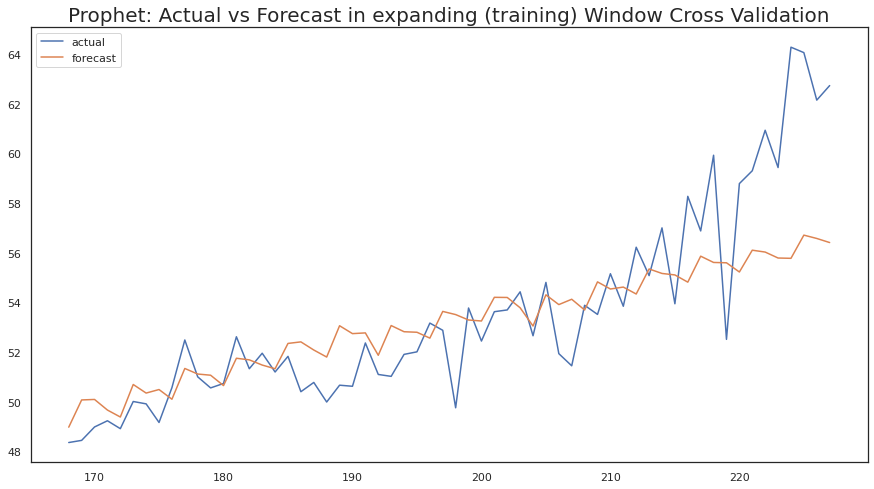

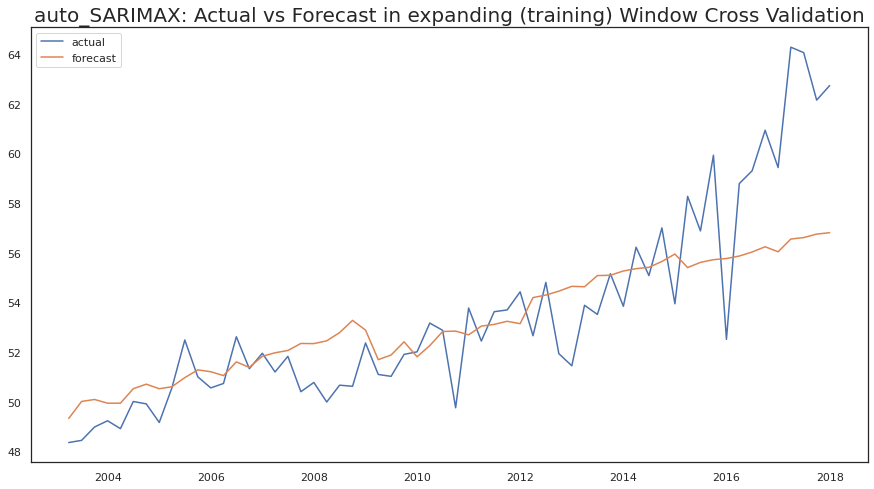

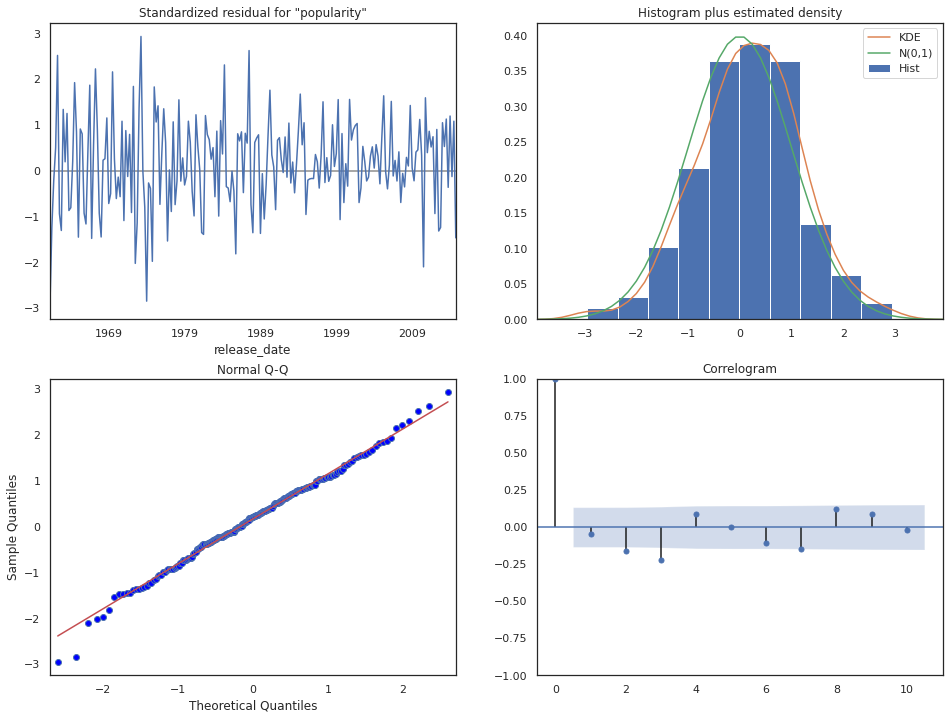

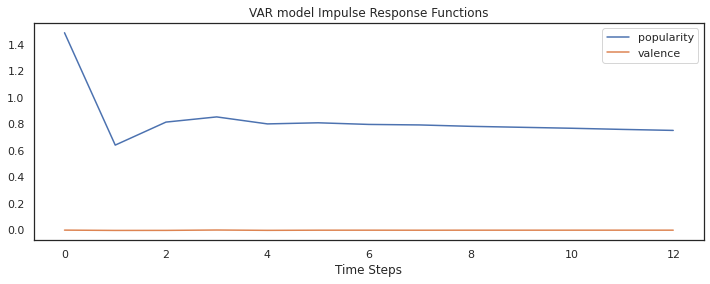

In [ ]:
# Inicializar el objeto del modelo Auto-TS, y ajustando el set de entrenamiento
model = auto_timeseries(forecast_period=spotify_test.shape[0], time_interval='Q' 
                        , score_type='rmse' , model_type='best')  

model.fit(traindata=spotify_train, ts_column="release_date", target="popularity", cv=5)

In [ ]:
model.get_leaderboard()

,name,rmse
0,Prophet,1.984466
1,auto_SARIMAX,1.987249
2,VAR,3.163061
3,ML,inf


In [ ]:
model.get_cv_scores()

,Model,CV Scores
0,Prophet,0.860467
1,Prophet,1.316054
2,Prophet,1.388469
3,Prophet,1.370475
4,Prophet,4.986866
5,auto_SARIMAX,0.987980
6,auto_SARIMAX,1.467866
7,auto_SARIMAX,1.132156
8,auto_SARIMAX,1.604738
9,auto_SARIMAX,4.743502


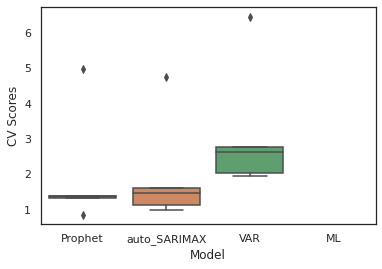

In [ ]:
model.plot_cv_scores();

In [ ]:
# Guardando los resultados del modelo
results_dict = model.get_ml_dict()

In [ ]:
# Ver un modelo y sus resultados
results_dict['VAR']['forecast']

In [ ]:
# Eligiendo uno de los modelos y obtener todos los valores pronosticados
future_predictions_P = model.predict(testdata=spotify_test, model='Prophet')
future_predictions_P

Building Forecast dataframe. Forecast Period = 12


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-31,57.124267,56.795793,60.787255,57.124267,57.124267,1.658538,1.658538,1.658538,1.658538,1.658538,1.658538,0.0,0.0,0.0,58.782805
1,2018-06-30,57.301654,57.666122,61.671522,57.301594,57.301823,2.367617,2.367617,2.367617,2.367617,2.367617,2.367617,0.0,0.0,0.0,59.669271
2,2018-09-30,57.480991,57.661060,61.655967,57.475099,57.488718,2.183868,2.183868,2.183868,2.183868,2.183868,2.183868,0.0,0.0,0.0,59.664859
3,2018-12-31,57.660327,57.131778,61.313292,57.644392,57.678047,1.651365,1.651365,1.651365,1.651365,1.651365,1.651365,0.0,0.0,0.0,59.311692
4,2019-03-31,57.835766,57.549614,61.540628,57.804523,57.865176,1.752103,1.752103,1.752103,1.752103,1.752103,1.752103,0.0,0.0,0.0,59.587869
5,2019-06-30,58.013153,58.375705,62.244775,57.967270,58.061601,2.294366,2.294366,2.294366,2.294366,2.294366,2.294366,0.0,0.0,0.0,60.307519
6,2019-09-30,58.192490,58.376150,62.359488,58.126004,58.261306,2.291841,2.291841,2.291841,2.291841,2.291841,2.291841,0.0,0.0,0.0,60.484331
7,2019-12-31,58.371826,57.888179,61.825794,58.289133,58.456942,1.514773,1.514773,1.514773,1.514773,1.514773,1.514773,0.0,0.0,0.0,59.886600
8,2020-03-31,58.549214,57.982507,62.215623,58.442944,58.658506,1.466153,1.466153,1.466153,1.466153,1.466153,1.466153,0.0,0.0,0.0,60.015367
9,2020-06-30,58.726601,59.234922,63.282021,58.590159,58.863662,2.509807,2.509807,2.509807,2.509807,2.509807,2.509807,0.0,0.0,0.0,61.236408


In [ ]:
future_predictions_A = model.predict(testdata=spotify_test, model='auto_SARIMAX')
future_predictions_A

popularity,yhat,mean_se,mean_ci_lower,mean_ci_upper
2018-03-31,62.811380,1.469370,59.931469,65.691292
2018-06-30,63.312447,1.576916,60.221749,66.403145
2018-09-30,63.136057,1.701723,59.800741,66.471373
2018-12-31,63.617150,1.744481,60.198031,67.036269
2019-03-31,63.632792,1.866386,59.974743,67.290841
2019-06-30,63.897011,1.914642,60.144381,67.649640
2019-09-30,63.925958,2.007288,59.991745,67.860170
2019-12-31,64.204578,2.064600,60.158036,68.251120
2020-03-31,64.591977,2.138971,60.399672,68.784283
2020-06-30,64.680108,2.199840,60.368500,68.991716


In [ ]:
future_predictions_V = model.predict(testdata=spotify_test, model='VAR')
future_predictions_V

popularity,yhat,mean_se,mean_ci_lower,mean_ci_upper
2018-03-31,63.257039,1.573758,60.172530,66.341549
2018-06-30,63.157226,1.704477,59.816513,66.497940
2018-09-30,63.231194,1.942488,59.423988,67.038400
2018-12-31,63.351734,2.155637,59.126762,67.576706
2019-03-31,63.341215,2.342251,58.750486,67.931943
2019-06-30,63.352260,2.526323,58.400758,68.303763
2019-09-30,63.349754,2.697368,58.063010,68.636498
2019-12-31,63.322912,2.862813,57.711901,68.933923
2020-03-31,63.291550,3.020068,57.372326,69.210774
2020-06-30,63.250439,3.171100,57.035197,69.465681


In [ ]:
spotify_test['p_Prophet'] = future_predictions_P['yhat'].values     # Seleccionando las predicciones de Prophet
spotify_test['p_Arima'] = future_predictions_A['yhat'].values
spotify_test['p_VAR'] = future_predictions_V['yhat'].values
spotify_test

,valence,energy,popularity,p_Prophet,p_Arima,p_VAR
release_date,,,,,,
2018-03-31,0.428756,0.586772,64.401114,58.782805,62.811380,63.257039
2018-06-30,0.477374,0.618250,64.856187,59.669271,63.312447,63.157226
2018-09-30,0.461677,0.609098,62.455357,59.664859,63.136057,63.231194
2018-12-31,0.423717,0.592664,61.931232,59.311692,63.617150,63.351734
2019-03-31,0.429813,0.607974,62.369501,59.587869,63.632792,63.341215
2019-06-30,0.490962,0.599323,67.021368,60.307519,63.897011,63.352260
2019-09-30,0.456073,0.587328,67.725338,60.484331,63.925958,63.349754
2019-12-31,0.452824,0.585462,63.462279,59.886600,64.204578,63.322912
2020-03-31,0.486471,0.627107,71.708092,60.015367,64.591977,63.291550


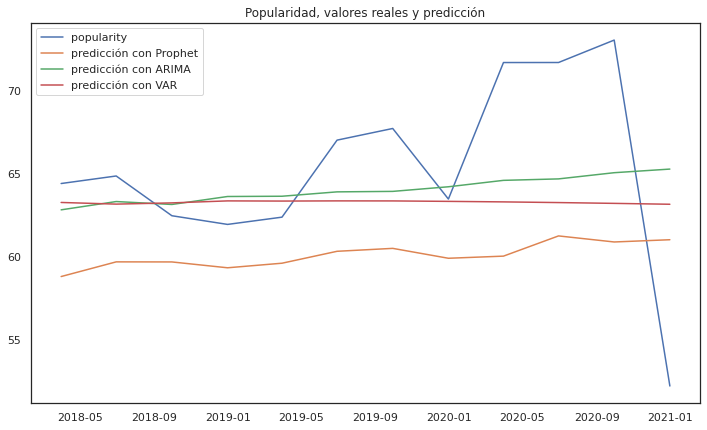

In [ ]:
# Graficar datos de entrenamiento, test de la variable popularity
plt.figure(figsize=(12, 7))
plt.plot(spotify_test['popularity'], label='popularity')
plt.plot(spotify_test['p_Prophet'], label='predicción con Prophet')
plt.plot(spotify_test['p_Arima'], label='predicción con ARIMA')
plt.plot(spotify_test['p_VAR'], label='predicción con VAR')

# Plot legend and show figure
plt.legend()
plt.title('Popularidad, valores reales y predicción');

In this article, we have discussed how to implement time series modeling in one line of Python code. Auto-TS does the preprocessing of data, as it removes the outliers from the data and handles messy data by learning optimal NaN imputation. Using just a single line of code, by initializing the Auto-TS object and fitting the train data, you can train multiple time series models including ARIMA, SARIMAX, FB Prophet, VAR, and come up with the best performing model. The result of the model does seem satisfactory, but if we try to increase the size of the dataset, the results may improve.

## Energy

Start of Fit.....
    Target variable given as = energy
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: release_date sep: , target: energy
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (228, 3)
No time series plot since verbose = 0. Continuing
Time Interval is given as Q
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 168 Test Shape: 12
    Root Mean Squared Error predictions vs actuals = 0.04
    Std Deviation of actuals = 0.02
    Normalized RMSE = 231%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 180 Test Shape: 12
    Root Mean Squared Error predictions vs actuals

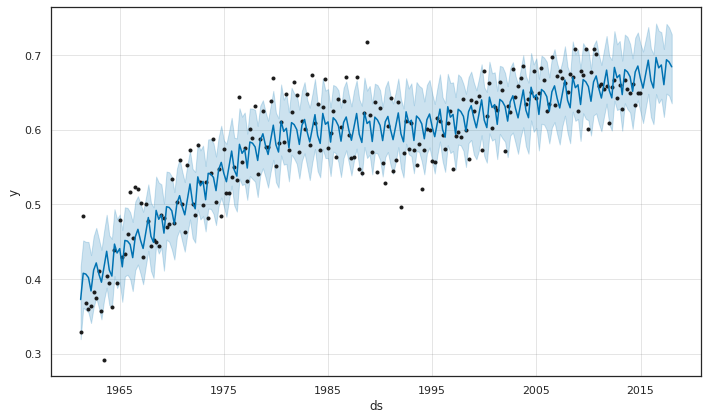

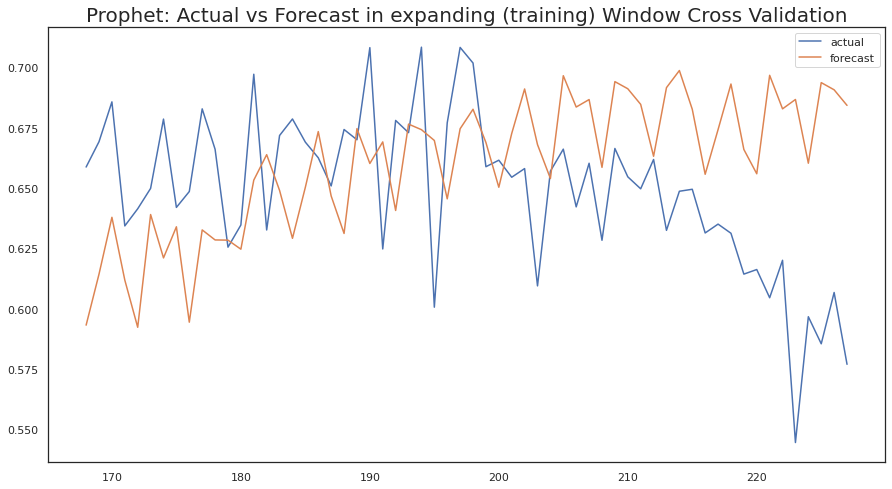

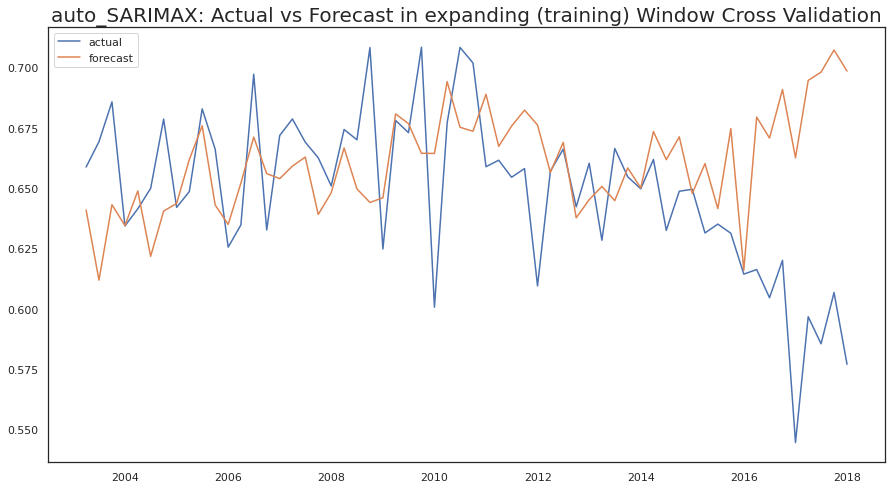

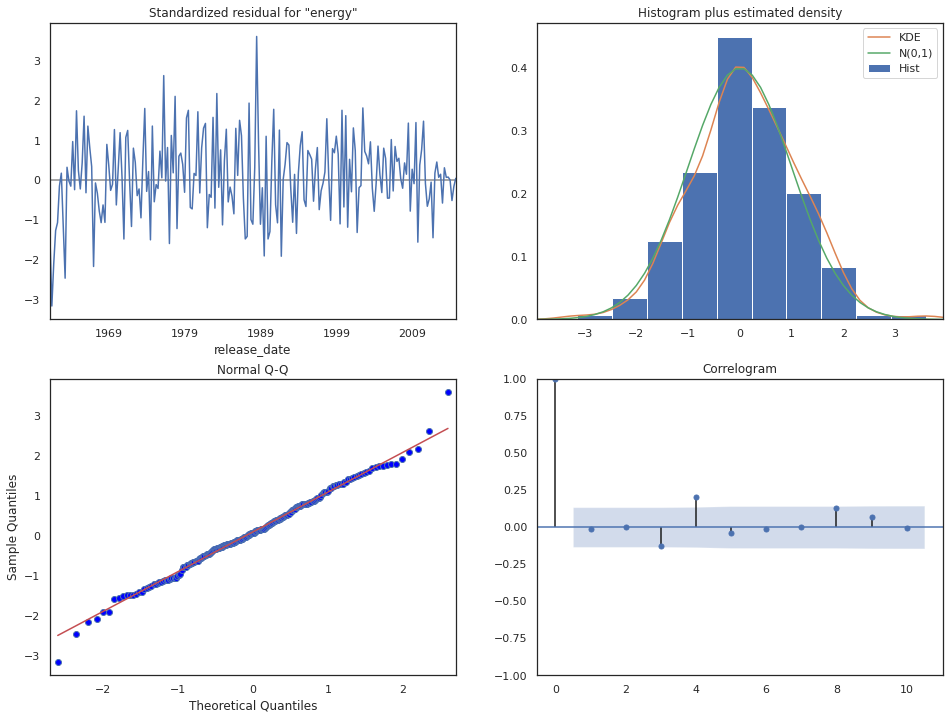

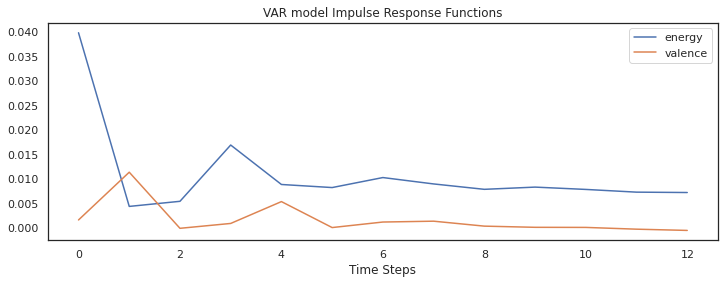

In [ ]:
# Inicializar el objeto del modelo Auto-TS, y ajustando el set de entrenamiento
model = auto_timeseries(forecast_period=spotify_test.shape[0], time_interval='Q' 
                        , score_type='rmse' , model_type='best')  

model.fit(traindata=spotify_train, ts_column="release_date", target="energy", cv=5)

In [ ]:
model.get_leaderboard()

,name,rmse
2,VAR,0.032614
1,auto_SARIMAX,0.036543
0,Prophet,0.045338
3,ML,inf


In [ ]:
# Eligiendo uno de los modelos y obtener todos los valores pronosticados
future_predictions_P = model.predict(testdata=spotify_test, model='Prophet')
future_predictions_A = model.predict(testdata=spotify_test, model='auto_SARIMAX')
future_predictions_V = model.predict(testdata=spotify_test, model='VAR')

# Sumando las columnas de pronosticos al dataset de test
spotify_test['p_Prophet'] = future_predictions_P['yhat'].values     # Seleccionando las predicciones de Prophet
spotify_test['p_Arima'] = future_predictions_A['yhat'].values
spotify_test['p_VAR'] = future_predictions_V['yhat'].values

Building Forecast dataframe. Forecast Period = 12


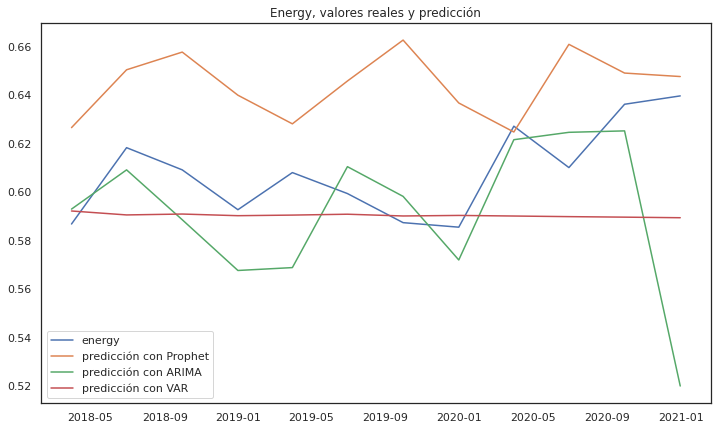

In [ ]:
# Graficar datos de entrenamiento, test de la variable energy
plt.figure(figsize=(12, 7))
plt.plot(spotify_test['energy'], label='energy')
plt.plot(spotify_test['p_Prophet'], label='predicción con Prophet')
plt.plot(spotify_test['p_Arima'], label='predicción con ARIMA')
plt.plot(spotify_test['p_VAR'], label='predicción con VAR')

# Plot legend and show figure
plt.legend()
plt.title('Energy, valores reales y predicción');

## Valence

Start of Fit.....
    Target variable given as = valence
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: release_date sep: , target: valence
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (228, 3)
No time series plot since verbose = 0. Continuing
Time Interval is given as Q
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 168 Test Shape: 12
    Root Mean Squared Error predictions vs actuals = 0.03
    Std Deviation of actuals = 0.03
    Normalized RMSE = 96%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 180 Test Shape: 12
    Root Mean Squared Error predictions vs actual

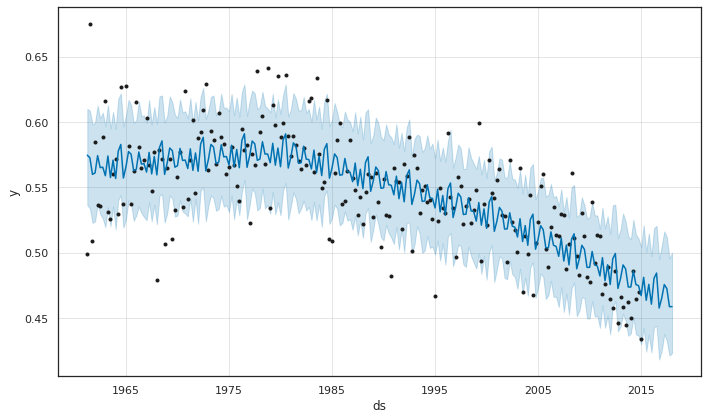

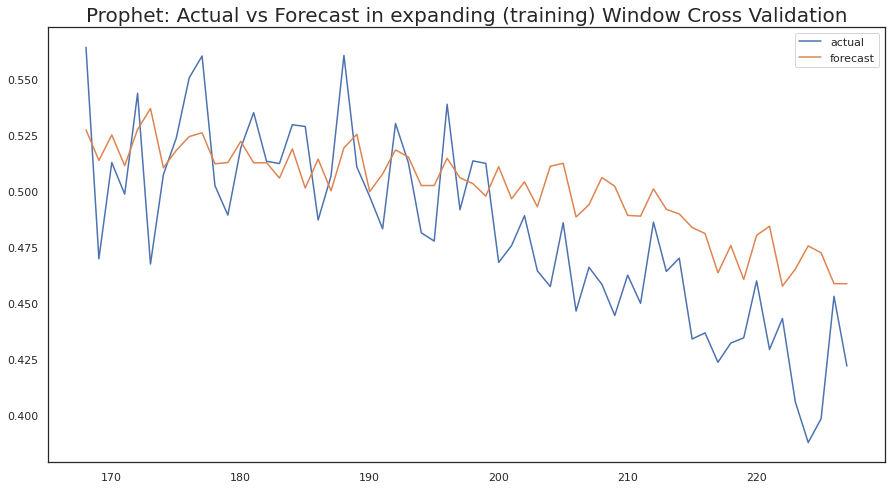

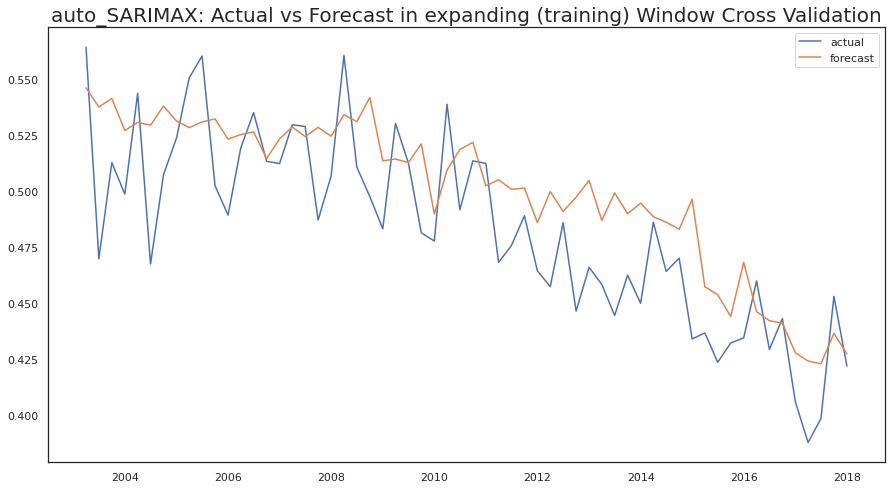

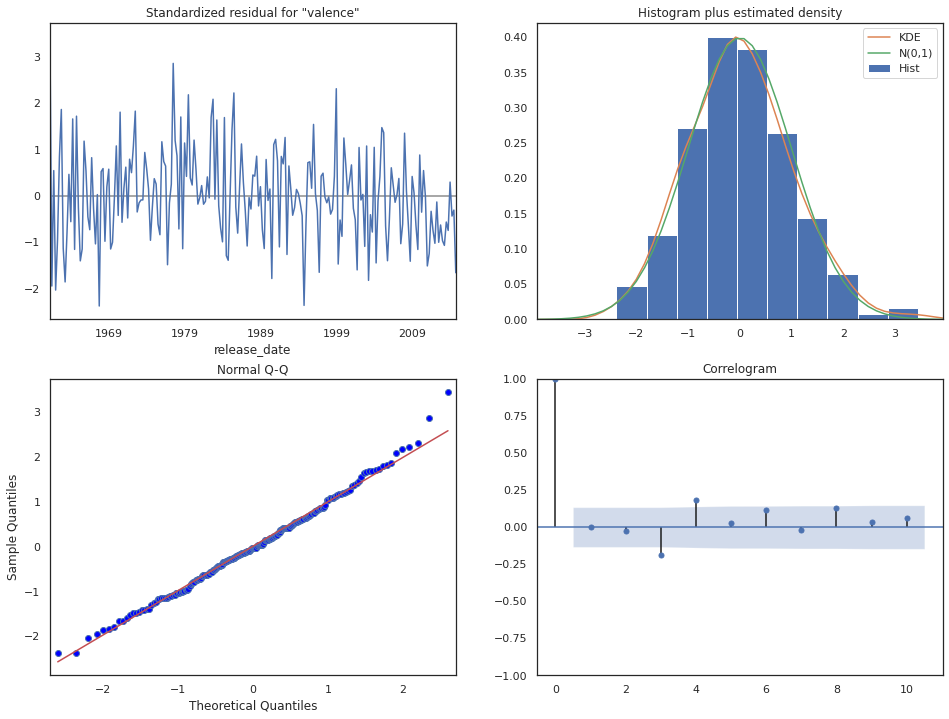

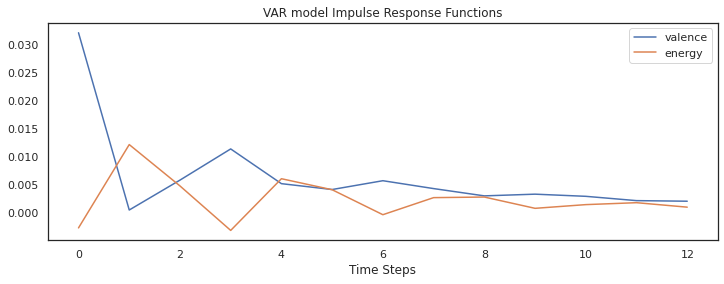

In [ ]:
# Inicializar el objeto del modelo Auto-TS, y ajustando el set de entrenamiento
model = auto_timeseries(forecast_period=spotify_test.shape[0], time_interval='Q' 
                        , score_type='rmse' , model_type='best')  

model.fit(traindata=spotify_train, ts_column="release_date", target="valence", cv=5)

In [ ]:
model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,0.028140
0,Prophet,0.031795
2,VAR,0.047850
3,ML,inf


In [ ]:
# Eligiendo uno de los modelos y obtener todos los valores pronosticados
future_predictions_P = model.predict(testdata=spotify_test, model='Prophet')
future_predictions_A = model.predict(testdata=spotify_test, model='auto_SARIMAX')
future_predictions_V = model.predict(testdata=spotify_test, model='VAR')

# Sumando las columnas de pronosticos al dataset de test
spotify_test['p_Prophet'] = future_predictions_P['yhat'].values     # Seleccionando las predicciones de Prophet
spotify_test['p_Arima'] = future_predictions_A['yhat'].values
spotify_test['p_VAR'] = future_predictions_V['yhat'].values

Building Forecast dataframe. Forecast Period = 12


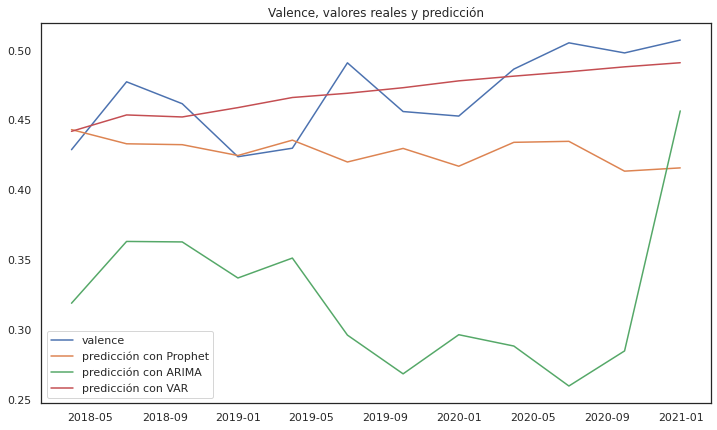

In [ ]:
# Graficar datos de entrenamiento, test de la variable valence
plt.figure(figsize=(12, 7))
plt.plot(spotify_test['valence'], label='valence')
plt.plot(spotify_test['p_Prophet'], label='predicción con Prophet')
plt.plot(spotify_test['p_Arima'], label='predicción con ARIMA')
plt.plot(spotify_test['p_VAR'], label='predicción con VAR')

# Plot legend and show figure
plt.legend()
plt.title('Valence, valores reales y predicción');